**LetsGrowMore(LGMVIP)- "DATA SCIENCE INTERN "**

**LGMVIP April-22**

**AUTHOR -PARAG PATIL**

**INTERMEDIATE LEVEL TASK**

**TASK 5 :Exploratory Data Analysis on Dataset - Terrorism**

Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [ ]:
data=pd.read_csv(r"/content/globalterrorismdb_0718dist.csv",encoding='latin1')
print("Data has been successfully imported")
data.head()

Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Feature Engineering


Check the names of all the columns and select out all the important columns which are needed in analysis.

In [ ]:
data.shape

(55419, 135)

In [ ]:
data.head

<bound method NDFrame.head of             eventid  iyear  imonth  iday approxdate  extended resolution  \
0      197000000001   1970       7     2        NaN         0        NaN   
1      197000000002   1970       0     0        NaN         0        NaN   
2      197001000001   1970       1     0        NaN         0        NaN   
3      197001000002   1970       1     0        NaN         0        NaN   
4      197001000003   1970       1     0        NaN         0        NaN   
...             ...    ...     ...   ...        ...       ...        ...   
55414  199403050002   1994       3     5        NaN         0        NaN   
55415  199403050003   1994       3     5        NaN         0        NaN   
55416  199403050004   1994       3     5        NaN         0        NaN   
55417  199403050005   1994       3     5        NaN         0        NaN   
55418  199403050006   1994       3     5        NaN         0        NaN   

       country         country_txt  region  ... addnotes 

In [ ]:
data.info

<bound method DataFrame.info of             eventid  iyear  imonth  iday approxdate  extended resolution  \
0      197000000001   1970       7     2        NaN         0        NaN   
1      197000000002   1970       0     0        NaN         0        NaN   
2      197001000001   1970       1     0        NaN         0        NaN   
3      197001000002   1970       1     0        NaN         0        NaN   
4      197001000003   1970       1     0        NaN         0        NaN   
...             ...    ...     ...   ...        ...       ...        ...   
55414  199403050002   1994       3     5        NaN         0        NaN   
55415  199403050003   1994       3     5        NaN         0        NaN   
55416  199403050004   1994       3     5        NaN         0        NaN   
55417  199403050005   1994       3     5        NaN         0        NaN   
55418  199403050006   1994       3     5        NaN         0        NaN   

       country         country_txt  region  ... addnote

In [ ]:
for i in data.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [ ]:
#rename the columns
data.rename(columns={'eventid':'EventID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'success':'Success','suicide':'Suicide','provstate':'state','propvalue':'Propvalue',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualities"]=data["Killed"]+data["Wounded"]

In [ ]:
# filtering out the important data in whole dataset those I'm using further processing.
data=data[['EventID','Year','Month','Day','Country','state','Region','city','Success','Suicide','Propvalue','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Casualities']]

In [ ]:
data.head()

,EventID,Year,Month,Day,Country,state,Region,city,Success,Suicide,...,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,1,0,...,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,1,0,...,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,1,0,...,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,1,0,...,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,1,0,...,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [ ]:
data.shape

(55419, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55419 entries, 0 to 55418
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EventID      55419 non-null  int64  
 1   Year         55419 non-null  int64  
 2   Month        55419 non-null  int64  
 3   Day          55419 non-null  int64  
 4   Country      55419 non-null  object 
 5   state        55149 non-null  object 
 6   Region       55419 non-null  object 
 7   city         55419 non-null  object 
 8   Success      55419 non-null  int64  
 9   Suicide      55419 non-null  int64  
 10  Propvalue    9897 non-null   float64
 11  latitude     52445 non-null  float64
 12  longitude    52444 non-null  float64
 13  AttackType   55419 non-null  object 
 14  Killed       55419 non-null  float64
 15  Wounded      55419 non-null  float64
 16  Target       55033 non-null  object 
 17  Summary      1276 non-null   object 
 18  Group        55419 non-null  object 
 19  Targ

In [ ]:
data.isnull().sum() # data missing

EventID            0
Year               0
Month              0
Day                0
Country            0
state            270
Region             0
city               0
Success            0
Suicide            0
Propvalue      45522
latitude        2974
longitude       2975
AttackType         0
Killed             0
Wounded            0
Target           386
Summary        54143
Group              0
Target_type        0
Weapon_type        0
Motive         54424
Casualities        0
dtype: int64

In [ ]:
data.describe()

,EventID,Year,Month,Day,Success,Suicide,Propvalue,latitude,longitude,Killed,Wounded,Casualities
count,5.541900e+04,55419.000000,55419.000000,55419.000000,55419.000000,55419.000000,9.897000e+03,52445.000000,5.244400e+04,55419.000000,55419.000000,55419.000000
mean,1.985026e+11,1984.960429,6.418936,15.330139,0.917898,0.000776,5.089165e+05,17.143388,-1.662983e+03,1.835093,1.474891,3.309984
std,5.558471e+08,5.558462,3.415463,8.825294,0.274522,0.027845,2.775361e+07,25.132533,3.763468e+05,7.875346,9.724172,13.710286
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.981071e+11,1981.000000,3.000000,8.000000,1.000000,0.000000,5.000000e+03,4.667128,-7.687283e+01,0.000000,0.000000,0.000000
50%,1.986033e+11,1986.000000,6.000000,15.000000,1.000000,0.000000,2.000000e+04,14.575278,-6.448779e+00,0.000000,0.000000,0.000000
75%,1.990023e+11,1990.000000,9.000000,23.000000,1.000000,0.000000,5.000000e+04,38.494167,3.011354e+01,1.000000,0.000000,2.000000
max,1.994031e+11,1994.000000,12.000000,31.000000,1.000000,1.000000,2.700000e+09,64.837778,1.784419e+02,422.000000,800.000000,800.000000


Observation
1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191
4. Maximum number of total casualties in an event were: 9574


Exploratory Data Analysis - EDA

In [ ]:
# Total Number of people Casualities in terror attack
CasualitiesData = data.loc[:,'Casualities']
print('Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :', int(sum(CasualitiesData.dropna())))# drop the NaN values

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 183436


In [ ]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Killed']
print('Total number of people Killed due to Terrorist Attacks from 1970 to 2017 across the world :', int(sum(killData.dropna())))# drop the NaN values

Total number of people Killed due to Terrorist Attacks from 1970 to 2017 across the world : 101699


In [ ]:
# Total Number of people Wounded in terror attack
WoundedData = data.loc[:,'Wounded']
print('Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world :', int(sum(WoundedData.dropna())))# drop the NaN values

Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world : 81737


In [ ]:
# attackData
attackData = data.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,59222.0,12963.0,20809.0,1318.0,435.0,515.0,1449.0,141.0,4847.0


In [ ]:
countryData = data.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Venezuela,Vietnam,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,320.0,2.0,383.0,0.0,1209.0,0.0,400.0,2.0,9.0,21.0,...,171.0,0.0,433.0,97.0,1.0,32.0,15.0,44.0,69.0,136.0


1. Year wise Attacks
i. Number of Attacks in each Year

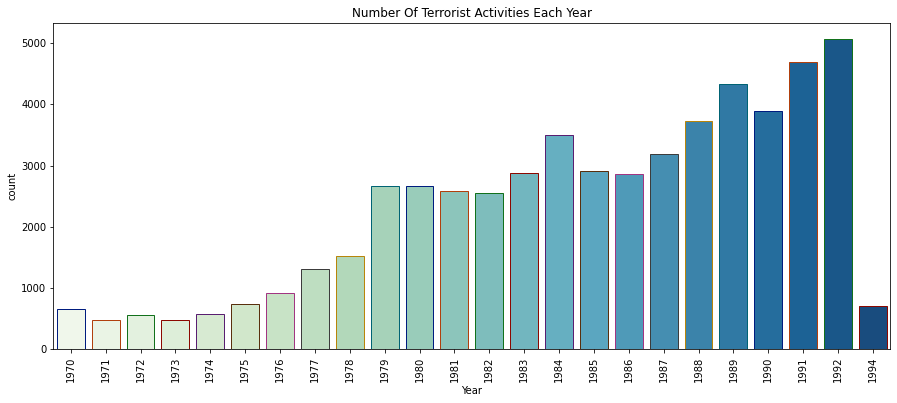

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='GnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Observation:

(i) Most number of attacks(16903) in 2014

(ii) Least number of attacks(471) in 1971




ii. Number of Casualties (Killed + Wounded) in each Year


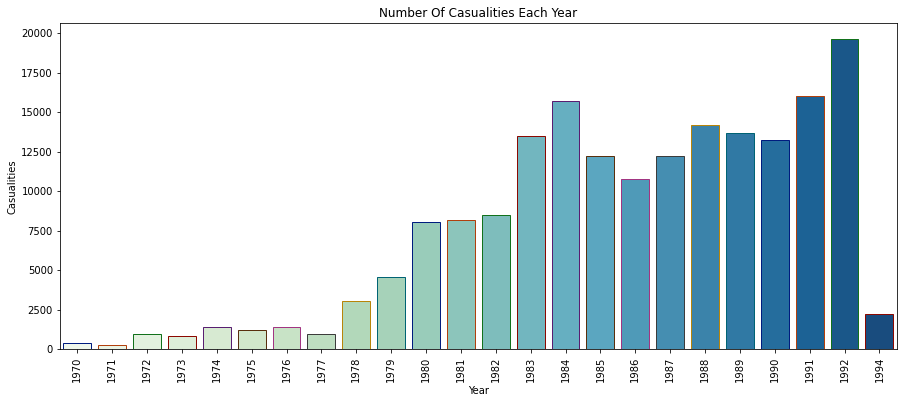

In [ ]:
plt.subplots(figsize=(15,6))
year_cas = data.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette="GnBu",edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()  

Observation:

(i) Most number of casualties: 85618 in 2014



(ii) Least number of casualties: 255 in 1971
2. Country wise Attacks [Top 15]
i. Number Of Total Attacks in Each Country

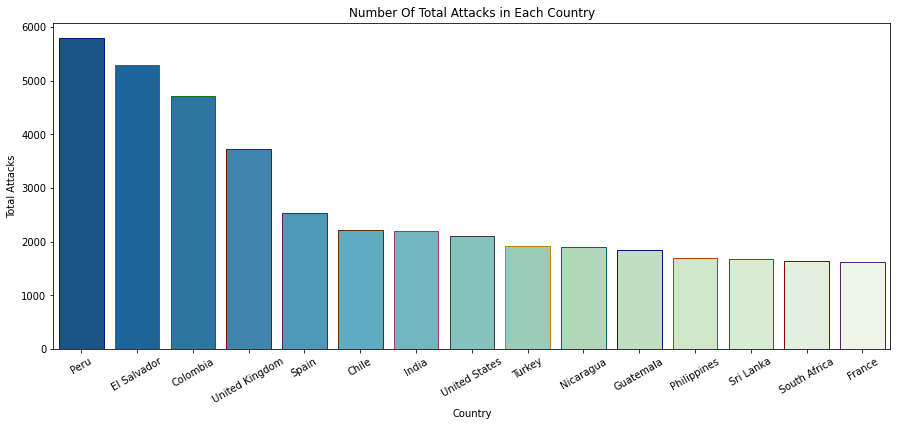

In [ ]:
plt.subplots(figsize=(15,6))
country_attacks = data['Country'].value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'GnBu_r',
            edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Attacks in Each Country')
plt.show()

Observation:


(i) Most number of attacks: 24636 in "Iraq"

(ii) Least number of attacks: 3249 in "Spain"



ii. Number of Casualties (Killed + Wounded) in Country

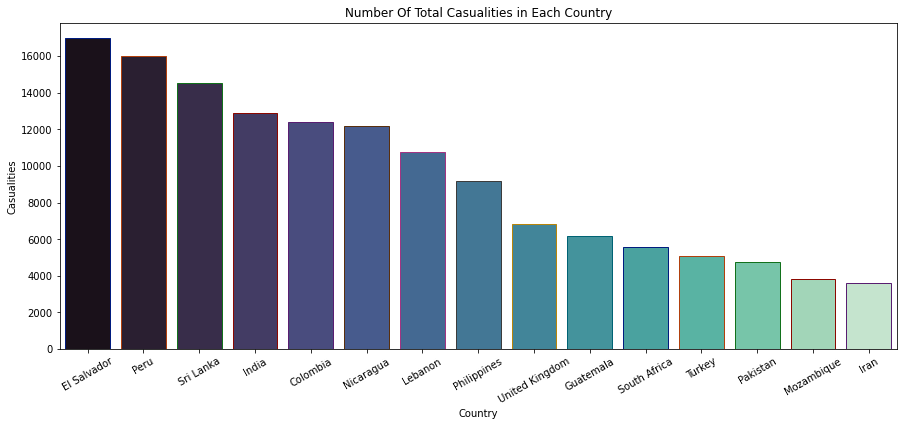

In [ ]:
plt.subplots(figsize=(15,6))
count_cas = data.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'mako',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Casualities in Each Country')
plt.show()

Observation:
    (i) Most number of casualties: 213279 in "Iraq"
    (ii) Least number of casualties: 16849 in "Peru"



3. Region wise Attacks

i. Terrorist Activities by Region in each Year

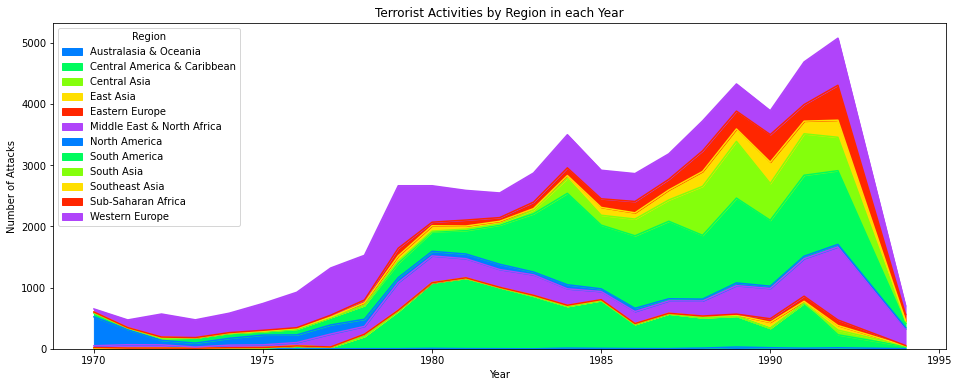

In [ ]:
pd.crosstab(data['Year'], data['Region']).plot(kind='area',figsize=(16,6),color=sns.color_palette('gist_ncar'))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Observation:
(i)  Most number of attacks in "Middle East & North Africa" in each year
(ii) Least number of attacks "Australasia & Oceania" in each year
ii. Total Number Of Attacks in Each Region

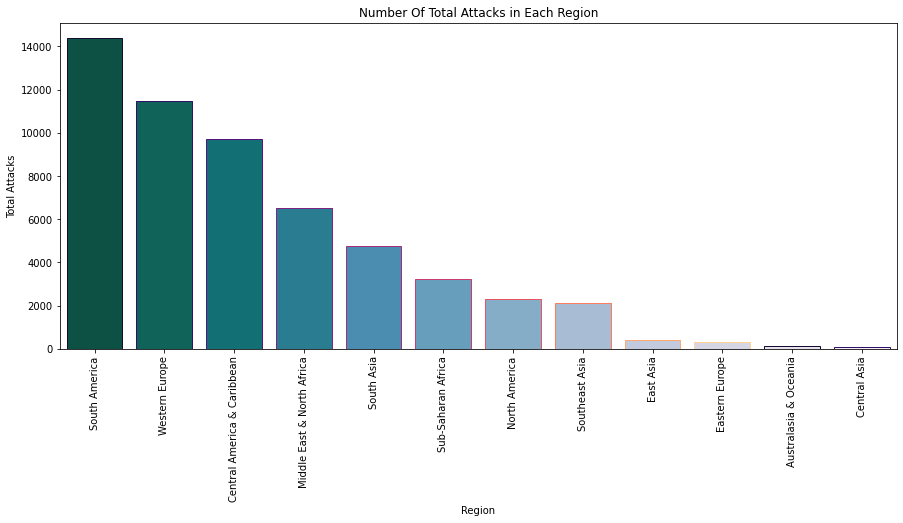

In [ ]:
region_attacks = data.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='PuBuGn_r', edgecolor=sns.color_palette('magma',10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Region')
plt.show()

Observation:
(i) Most number of attacks: 50474 in "Middle East & North Africa"
(ii) Least number of attacks: 282 in "Australasia & Oceania"
4. Total Number Of Attacks by Attack Type

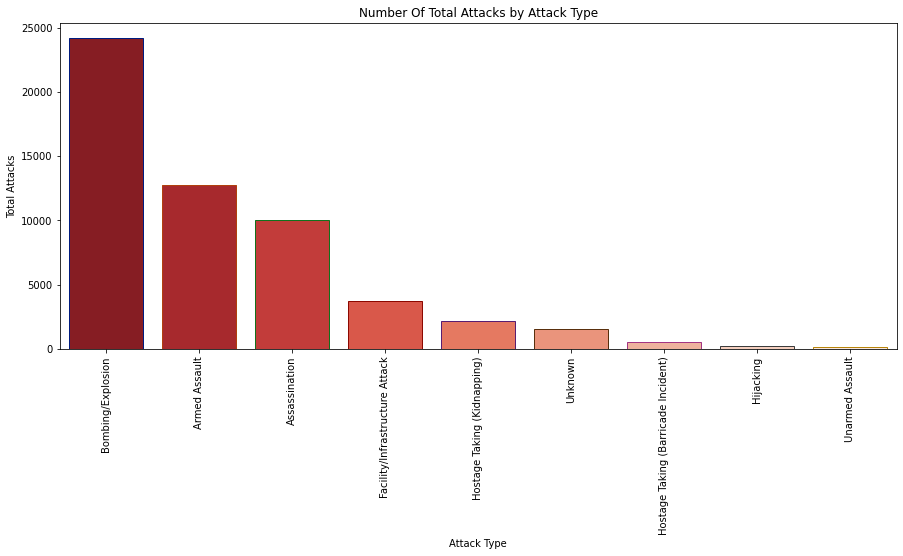

In [ ]:
attack_type = data.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='Reds_r',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

Observation:
(i) Most number of attacks : 88255 by "Bombing/Explosion"
(ii) Least number of attacks : 659 by "Hijacking"
5. Number Of Total Attacks and Casualities by city [Top20]

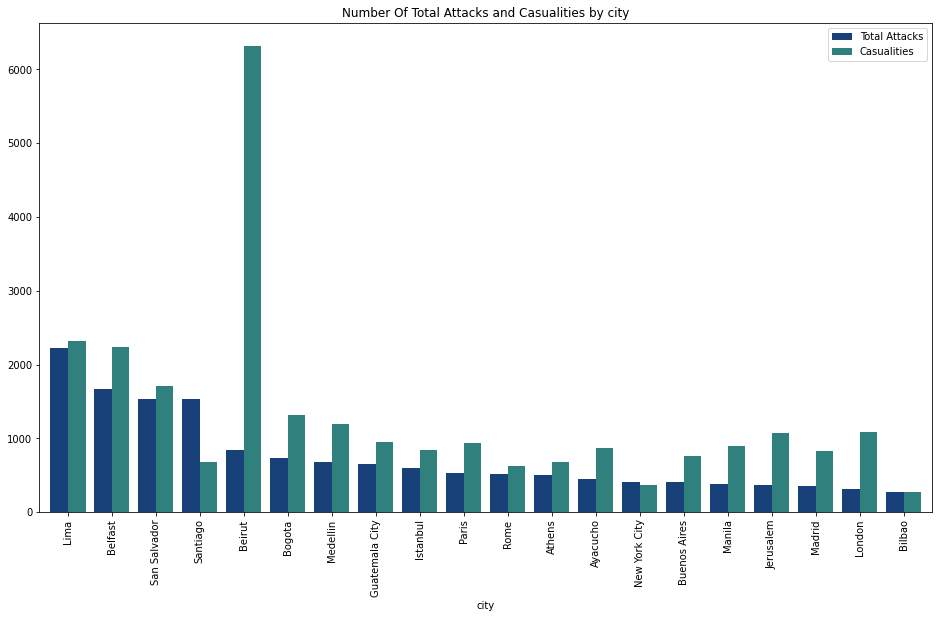

In [ ]:
city_attacks = data.city.value_counts().to_frame().reset_index()
city_attacks.columns = ['city', 'Total Attacks']
city_cas = data.groupby('city').Casualities.sum().to_frame().reset_index()
city_cas.columns = ['city', 'Casualities']
# city_cas.drop('Unknown', axis=0, inplace=True)
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('Total Attacks', ascending=False)[1:21]
sns.set_palette('gist_earth')
city_tot.plot.bar(x='city', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualities by city')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

Observation:
(i) Most number of attack : 7589 and also very high Casualities : 77876 by baghdad city
6. Number Of Total Attacks by Terrorist Group [Top 16]

In [ ]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Shining Path (SL),4338
1,Farabundo Marti National Liberation Front (FMLN),3350
2,Irish Republican Army (IRA),2524
3,Basque Fatherland and Freedom (ETA),1627
4,Palestinians,1022
5,New People's Army (NPA),957
6,Nicaraguan Democratic Force (FDN),895
7,Revolutionary Armed Forces of Colombia (FARC),854
8,National Liberation Army of Colombia (ELN),833
9,Manuel Rodriguez Patriotic Front (FPMR),815


Observation:
(i) Most number of attacks : 7478 by "Taliban" Terrorist Group
(ii) Least number of attacks : 1351 by "Tehrik-i-Taliban Pakistan (TTP)" Terrorist Group

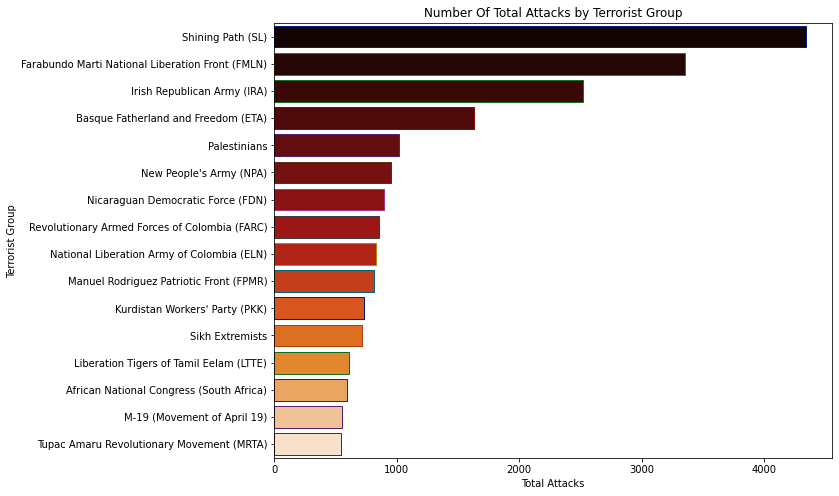

In [ ]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='gist_heat',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

Observation:
(i) Most number of attacks : 7478 by "Taliban" Terrorist Group
(ii) Least number of attacks : 1351 by "Tehrik-i-Taliban Pakistan (TTP)" Terrorist Group
7. Top Terrorist Groups Activities from 1970 to 2017

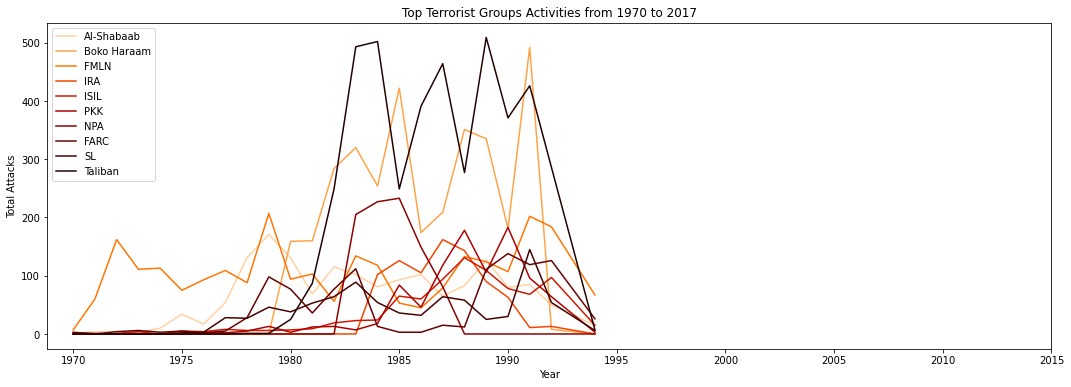

In [ ]:
groups_10 = data[data.Group.isin(data.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('gist_heat_r', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()


Observation:
(i) Terrorist Groups Activities from Year 1982 - 1994 are Increasing and again
    slow down for year 1995 to 2010
(ii) Terrorist Groups Activities from Year 2011 - 2017 are Increasing Rapidly and they are
    countinlously increasing
8. Number of people killed by countries

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

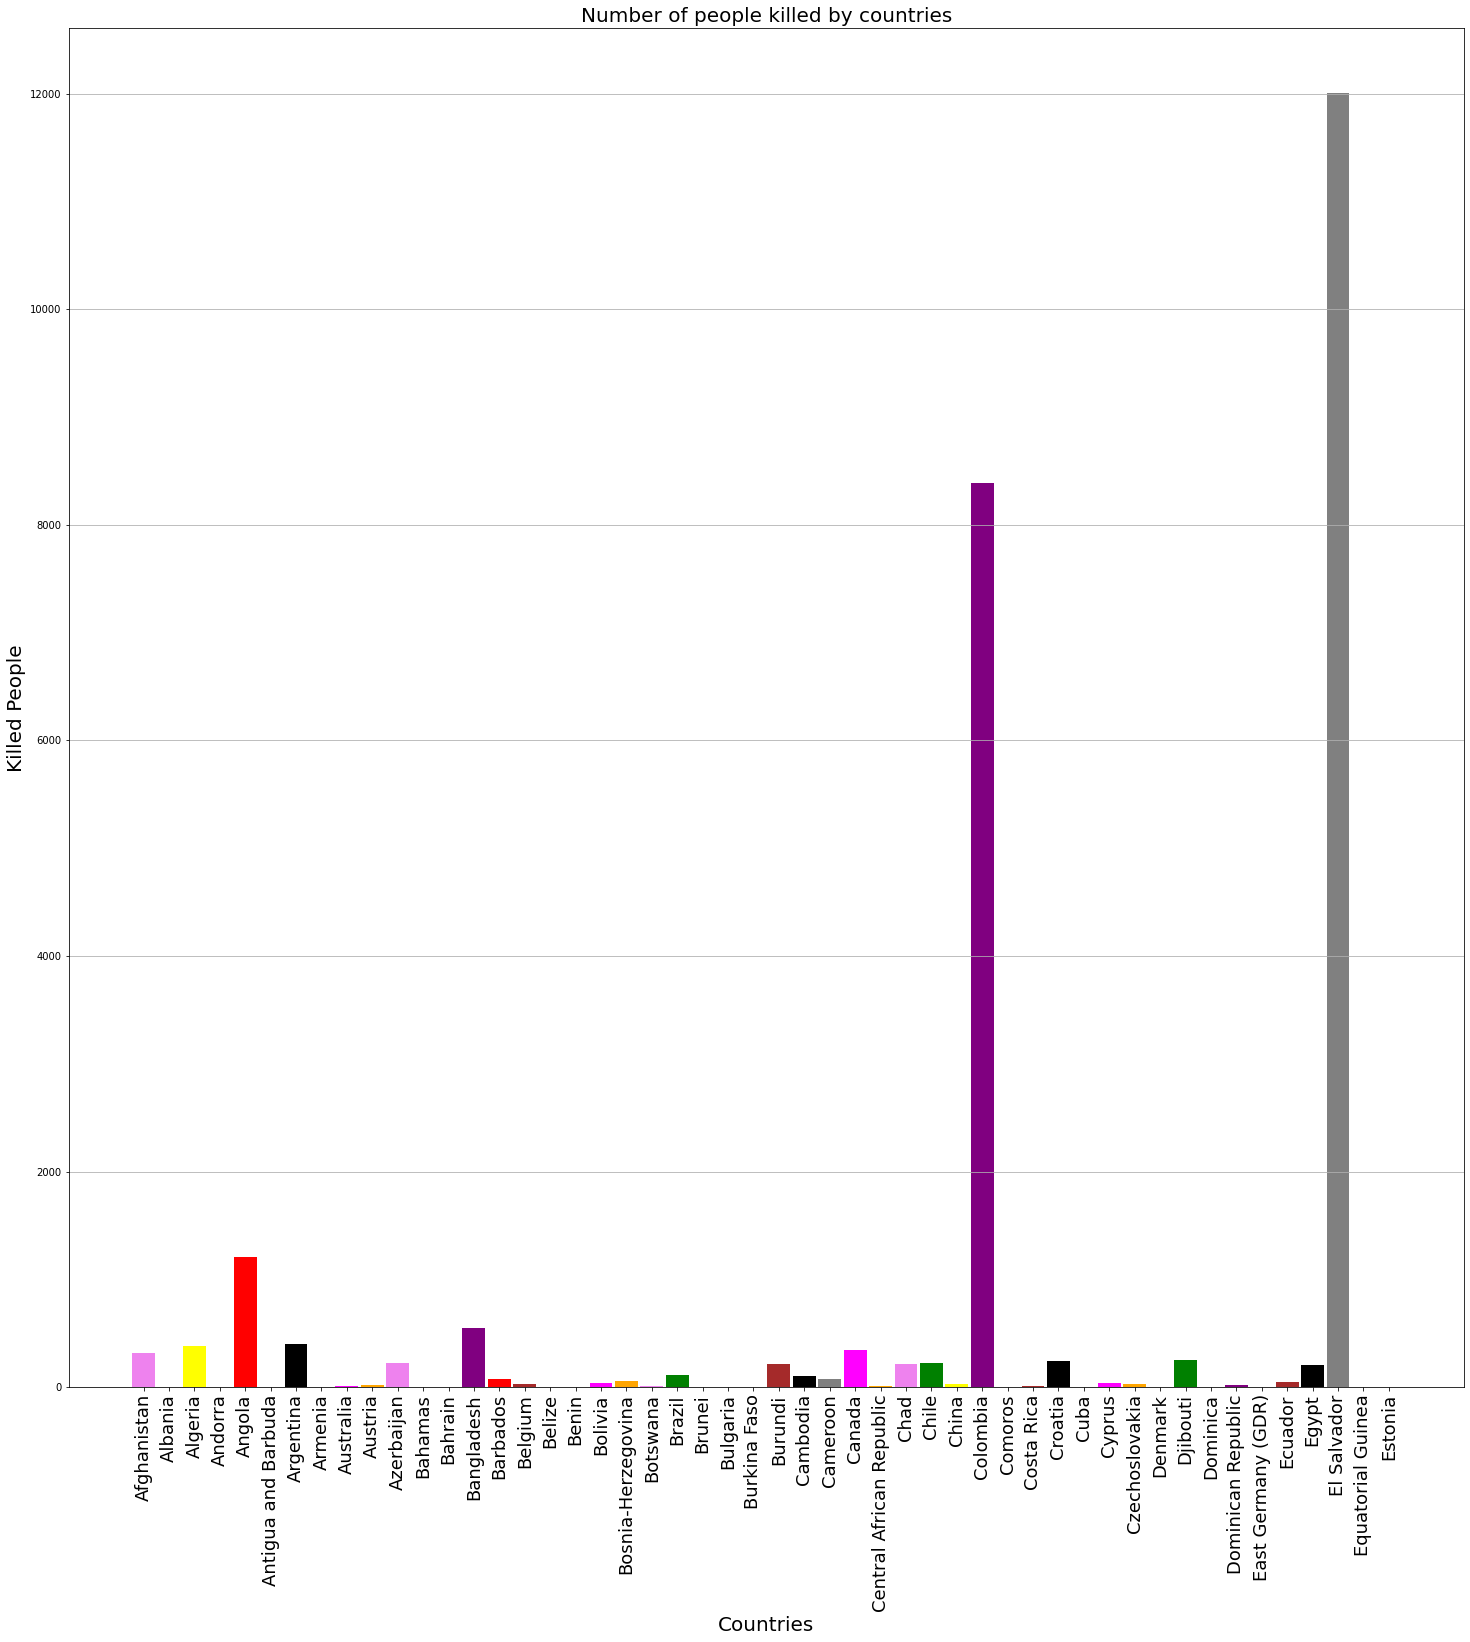

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['violet', 'green', 'yellow', 'purple', 'red', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

Observation:
(i) Most Number Of People Killed : 39384 by Afhganistan Country
(ii) Zero Number Of People Killed by Benin, Brunei, Andorra, Antigua and Berbuda Countries
9. Number Of Total Attacks and Casualities by Target_type

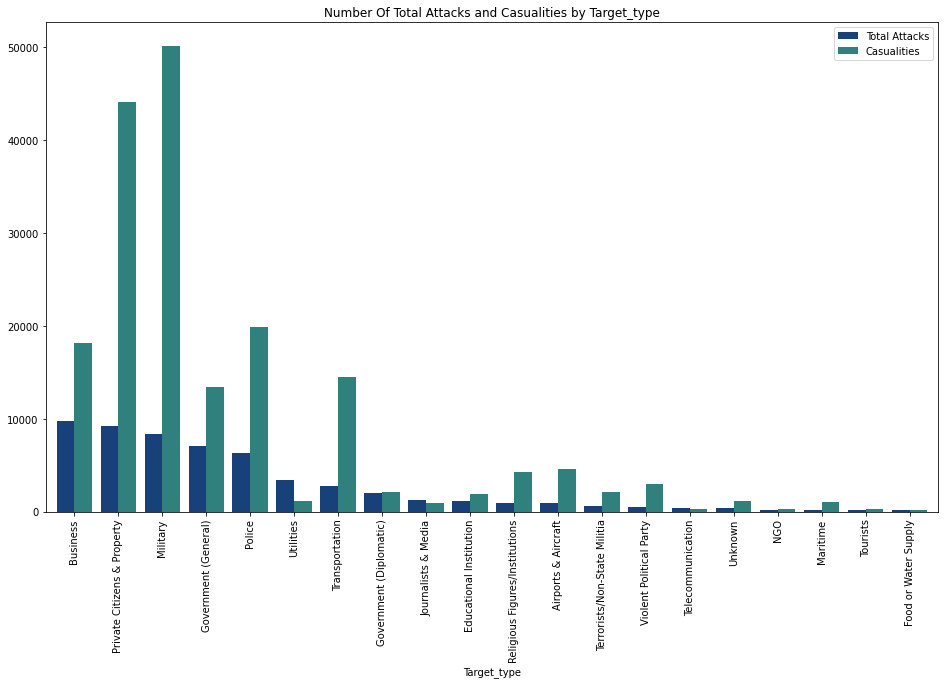

In [ ]:
Target_type_attacks = data.Target_type.value_counts().to_frame().reset_index()
Target_type_attacks.columns = ['Target_type', 'Total Attacks']
Target_type_cas = data.groupby('Target_type').Casualities.sum().to_frame().reset_index()
Target_type_cas.columns = ['Target_type', 'Casualities']
# city_cas.drop('Unknown', axis=0, inplace=True)
Target_type_tot = pd.merge(Target_type_attacks, Target_type_cas, how='left', on='Target_type').sort_values('Total Attacks', ascending=False)[0:20]
sns.set_palette('gist_earth')
Target_type_tot.plot.bar(x='Target_type', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualities by Target_type')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

Observation:
(i) Most number of attack : 43511 and also very high Casualities : 319176.0 
    by Private Citizens & Property Target type